# Predicción lineal

 En la figura se observa un filtro forward predictor con una estructura FIR

<img src="predictor.png" alt="Predictor lineal"/>

Las entradas a los taps son $u(i-1), u(i-2), ..., u(i-M)$. La idea de este filtro es predecir el valor siguiente de la señal $u(i)$, denotado $\hat{u}(i)$.

El objetivo es encontrar el vector de taps *${\hat{w}}$* que minimice la suma cuadrática de los errores de predicción, $e_f$

$$e_f = \sum_{i=M+1}^{N} \left|f_M(i)\right|^2$$

#### Encontrar:

1. La matriz de $M$ por $M$ de correlación los taps de entrada 

2. El vector de correlación cruzada $M$ por $1$ entre los taps de entrada del predictor y la respuesta deseada $u(i)$ 

3. El valor mínimo de $e_f$

4. El vector de taps *${\hat{w}}$*

5. Una vez obtenida la ecuación del filtro predictor, calcular el filtro para $N$ valores de una realización de la siguiente señal:

$$u(i) = sen(2\pi\omega_0i + \phi_0) + 0.02n(i)$$

siendo $\omega_0 = 3, \phi_0 = \pi / 4$ y $n(i)$ un ruido gaussiano de varianza unitaria. Tomar N = 100 y M = 4

6. Ver cómo se comporta el filtro (es decir, su capacidad de predicción) para otras realizaciones del mismo proceso.

#### Consejos orientativos:
* Pensar a $N$ como un valor mayor a $M$. Es decir, $N$ representa la cantidad TOTAL de puntos de $u(i)$ y $M$ es la cantidad de taps del filtro. En un momento dado, hay $M$ puntos de $u(i)$ dentro del filtro.
* Podemos pensar que el primer valor válido de $u$ es $u(1)$, es decir la secuencia empieza $u(1), u(2), \dots ,u(N)$
* El filtro produce resultados desde $i = M+1$ hasta $i = N$, es decir, $N-M$ predicciones.
* Al ser las señales reales, los valores hermíticos de los vectores o matrices son los traspuestos.
* Para multiplicación de matrices, utilizar @. Por ejemplo:

In [2]:
# Importar paquetes
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import inv
from sklearn.metrics import mean_squared_error
from IPython.display import HTML

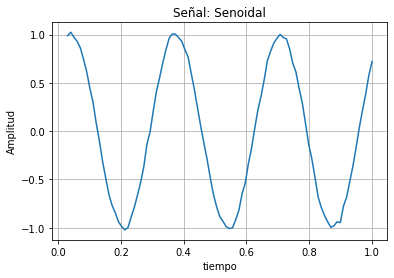

In [3]:
# Señal del problema
N  = 100
M  = 4
fs = 120

w0         = 3
phi0       = np.pi/4
amp_noise  = 0.02 

ts = 1/fs # tiempo de muestreo
tt     = np.linspace(0, 1, N).flatten()
signal = np.sin(2*w0*np.pi*tt + phi0)

# Creacion de ruido
noise  =  np.random.normal(0,amp_noise,np.size(signal))
signal_noise  = signal + noise
signal_out    = signal[M-1: -1]

# Graficar señal
plt.figure()
plt.plot(tt[M-1:], signal_noise[M-1:])
plt.title('Señal: Senoidal')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.grid(which='both', axis='both')
plt.show()


In [4]:
## Obtener coeficientes 

# Crear matriz hermetica [M,N-M+1]
rows    = M
columns = np.size(signal_noise) - M
hmatrix = np.zeros((rows, columns))
                   
for i in np.arange(columns):
    hmatrix[ : , i ]  =   signal_noise[np.arange(M + (i - 1) , (i-1) , -1 )]

# Calculo de coeficientes
correlation = hmatrix@hmatrix.transpose()
xcorrelation = hmatrix@signal_out

coef = inv(correlation)@xcorrelation

print(coef)

[ 0.7391049   0.33577911  0.0715824  -0.1656778 ]


In [5]:
# Calcular señal estimada y error cuadratico

signal_est = hmatrix.transpose()@coef

mse = np.mean((hmatrix - signal_est)**2)

print("Error cuadratico medio: {}".format(mse))

Error cuadratico medio: 0.062422385168556214


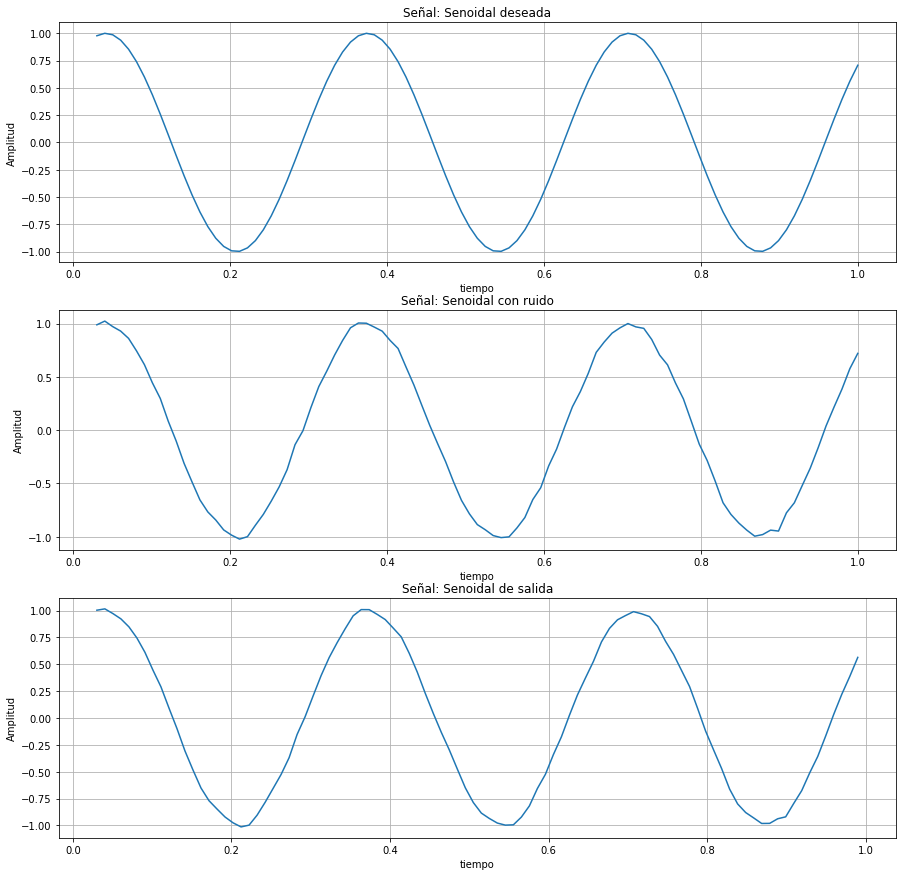

In [6]:
# Grafico de señales obtenida

plt.rcParams['figure.figsize'] = [15, 15]
plt.figure()
plt.subplot(3, 1, 1)
plt.grid()
plt.title('Señal: Senoidal deseada')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.plot(tt[M-1:],signal[M-1:])

plt.subplot(3, 1, 2)
plt.grid()
plt.title('Señal: Senoidal con ruido')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.plot(tt[M-1:],signal_noise[M-1:])

plt.subplot(3, 1, 3)
plt.grid()
plt.title('Señal: Senoidal de salida')
plt.xlabel('tiempo')
plt.ylabel('Amplitud')
plt.plot(tt[M-1:-1],signal_est)


In [7]:
# Se encapsula proceso anterior para probar diferentes escenarios con señales senoidales

def predictor(signal, tt_linspace, M, amp_noise, plot=False):
    
    N = np.size(signal)
    # Creacion de ruido
    noise  =  np.random.normal(0,amp_noise,np.size(signal))
    signal_noise  = signal + noise
    signal_out    = signal[M-1: -1]
    
    ## Obtener coeficientes 
    # Crear matriz hermetica [M,N-M+1]
    rows    = M
    columns = np.size(signal_noise) - M
    hmatrix = np.zeros((rows, columns))

    for i in np.arange(columns):
        hmatrix[ : , i ]  =   signal_noise[np.arange(M + (i - 1) , (i-1) , -1 )]

    # Calculo de coeficientes
    correlation = hmatrix@hmatrix.transpose()
    xcorrelation = hmatrix@signal_out

    coef = inv(correlation)@xcorrelation
    if (plot):
        print("Coeficientes: {}".format(coef))
    
    # Calcular señal estimada y error cuadratico
    signal_est = hmatrix.transpose()@coef
    mse = np.mean((hmatrix - signal_est)**2)
    
    if (plot):
        print("Error cuadratico medio: {}, {}".format(mse, mse*100.0))
        plt.figure(figsize=(9, 3), dpi= 80)
        plt.figure()
        plt.subplot(3, 1, 1)
        plt.grid()
        plt.title('Señal deseada')
        plt.xlabel('tiempo')
        plt.ylabel('Amplitud')
        plt.plot(tt[M-1:],signal[M-1:])
        plt.subplot(3, 1, 2)
        plt.grid()
        plt.title('Señal con ruido')
        plt.xlabel('tiempo')
        plt.ylabel('Amplitud')
        plt.plot(tt[M-1:],signal_noise[M-1:])
        plt.subplot(3, 1, 3)
        plt.grid()
        plt.title('Señal de salida')
        plt.xlabel('tiempo')
        plt.ylabel('Amplitud')
        plt.plot(tt[M-1:-1],signal_est)
    
    return mse
    

Coeficientes: [ 0.64692224  0.43163471  0.1273994  -0.22991282]
Error cuadratico medio: 0.0611650390024468, 6.1165039002446795


0.0611650390024468

<Figure size 720x240 with 0 Axes>

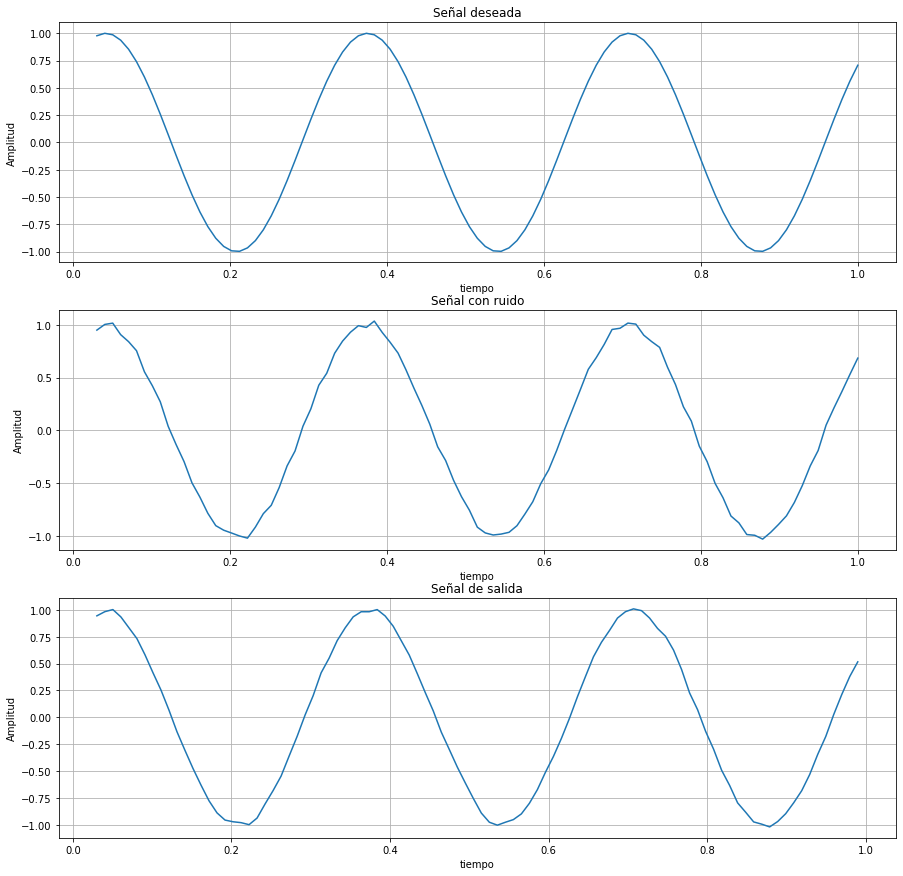

In [8]:
# Señal del problema
# Numero 0

N          = 100
M          = 4
fs         = 120
w0         = 3
phi0       = np.pi/4
amp_noise  = 0.02 
ts         = 1/fs
tt         = np.linspace(0, 1, N).flatten()
signal     = np.sin(2*w0*np.pi*tt + phi0)

predictor(signal,tt, M, amp_noise, True)

### Se prueban otros caso de paramtros de senoidales

In [9]:
# Se aumenta el la amplitud de ruido 5 veces  [Error = 0.1]

# Numero 1

N          = 100
M          = 4
fs         = 150
w0         = 3
phi0       = np.pi/4
amp_noise  = 0.02 * 5 
ts         = 1/fs
tt         = np.linspace(0, 1, N).flatten()
signal     = np.sin(2*w0*np.pi*tt + phi0)

predictor(signal,tt, M, amp_noise)

0.06985982716960583

Al aumentar la amplitud de ruido 5 veces el sistema predictor reduce el efecto creado por el ruido agregado y en efecto esto se nota en el error cuadratico medio.

In [10]:
# Se aumenta el la amplitud de ruido 10 veces [Error = 0.2]

# Numero 1

N          = 100
M          = 4
fs         = 150
w0         = 3
phi0       = np.pi/4
amp_noise  = 0.02 * 10 
ts         = 1/fs
tt         = np.linspace(0, 1, N).flatten()
signal     = np.sin(2*w0*np.pi*tt + phi0)

predictor(signal,tt, M, amp_noise)

0.08305759002337988

Al aumentar la amplitud de ruido 10 veces el sistema predictor reduce el efecto creado pero la forma de la señal se aleja mucho de la esperada.

In [11]:
# Se aumenta el la amplitud de ruido 50 veces [Error = 1]

# Numero 2

N          = 100
M          = 4
fs         = 150
w0         = 3
phi0       = np.pi/4
amp_noise  = 0.02 * 50
ts         = 1/fs
tt         = np.linspace(0, 1, N).flatten()
signal     = np.sin(2*w0*np.pi*tt + phi0)

predictor(signal,tt, M, amp_noise)

0.828325201340174

### Para M = 4

In [12]:
# Tabla comparativa de errores cuadraticos con N = 100 y M = 4
from pandas import DataFrame
 
def tableFactory(M=4, w0=3, phi0=np.pi/4, amp_noise=0.02):
    error = [1, 5, 10, 50]
    w, h = 3, len(error) + 1;
    rest = [[0 for x in range(w)] for y in range(h)]
    
    # N = 100
    N          = 100
    tt         = np.linspace(0, 1, N).flatten()
    signal     = np.sin(2*w0*np.pi*tt + phi0)

    rest[0][0] = ''
    i = 1
    for err in error:    
        rest[i][0] =  str('%.5f'%(predictor(signal,tt, M, amp_noise*err)))
        i += 1

    # N = 500  
    N          = 500
    tt         = np.linspace(0, 1, N).flatten()
    signal     = np.sin(2*w0*np.pi*tt + phi0)

    rest[0][1] = ''
    i = 1
    for err in error:    
        rest[i][1] =  str('%.5f'%(predictor(signal,tt, M, amp_noise*err)))
        i += 1

    # N = 1000  
    N          = 1000
    tt         = np.linspace(0, 1, N).flatten()
    signal     = np.sin(2*w0*np.pi*tt + phi0)

    rest[0][2] = ''
    i = 1
    for err in error:    
        rest[i][2] =  str('%.5f'%(predictor(signal,tt, M, amp_noise*err)))
        i += 1   

    df = DataFrame(rest, columns=['N = 100','N = 500', 'N = 1000'],
                   index=['Amplitud de error', 
                          0.02,
                          0.1, 
                          0.2, 
                          1
                         ])
    
    print('Tabla comparativa para M = {}'.format(M))

    return df
    
HTML(tableFactory().to_html())

Tabla comparativa para M = 4


,N = 100,N = 500,N = 1000
Amplitud de error,,,
0.02,0.06341,0.00272,0.00082
0.1,0.06636,0.00847,0.00778
0.2,0.07044,0.03524,0.03040
1,0.86135,0.78457,0.86831


### Para M = 10

In [13]:
# Tabla comparativa de errores cuadraticos M = 10
HTML(tableFactory(M=10).to_html())

Tabla comparativa para M = 10


,N = 100,N = 500,N = 1000
Amplitud de error,,,
0.02,0.44268,0.02032,0.00535
0.1,0.45771,0.02689,0.01262
0.2,0.46741,0.04770,0.03852
1,1.17755,0.92046,0.96704


### Para M = 20

In [14]:
# Tabla comparativa de errores cuadraticos M = 20
HTML(tableFactory(M=20).to_html())

Tabla comparativa para M = 20


,N = 100,N = 500,N = 1000
Amplitud de error,,,
0.02,1.09921,0.08712,0.02220
0.1,1.08908,0.08859,0.02978
0.2,1.13313,0.13148,0.05549
1,1.82342,0.99100,0.91197


Los resultados anteriorenes muestran que es posible mejorar el error cuadratico medio aimnetando el numero de muestras N y el valor de M en proporsiones consideradas donde siempre N debe ser mayo que M.

### Realizando pruebas con una señal cuadrada

Coeficientes: [ 1.00557290e+00 -3.61771760e-03 -1.14826264e-03 -7.35482519e-04]
Error cuadratico medio: 0.31224330323960947, 31.22433032396095


0.31224330323960947

<Figure size 720x240 with 0 Axes>

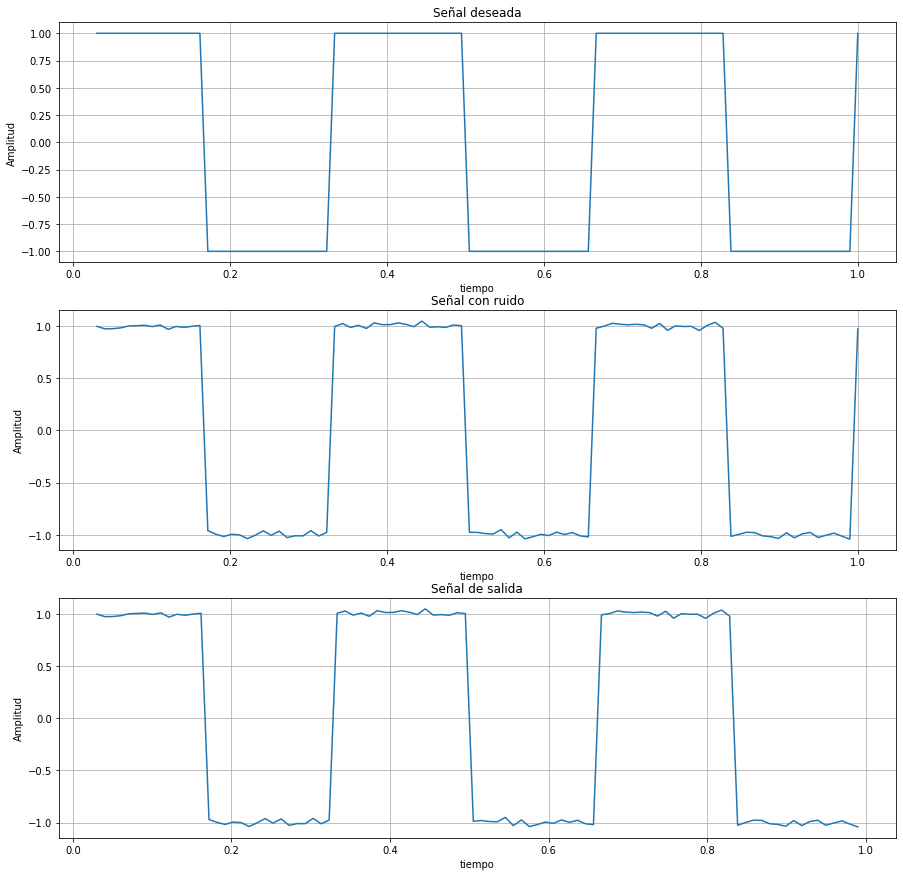

In [15]:
from scipy import signal as sgn

N          = 100
M          = 4
fs         = 150
w0         = 3
phi0       = np.pi/4
amp_noise  = 0.02
ts         = 1/fs
tt         = np.linspace(0, 1, N).flatten()
signal     = sgn.square(2 * np.pi * w0 *tt)

predictor(signal,tt, M, amp_noise, True)

Coeficientes: [ 0.78979342  0.12340049 -0.01477108  0.06510415]
Error cuadratico medio: 0.3235071248049917, 32.35071248049917


0.3235071248049917

<Figure size 720x240 with 0 Axes>

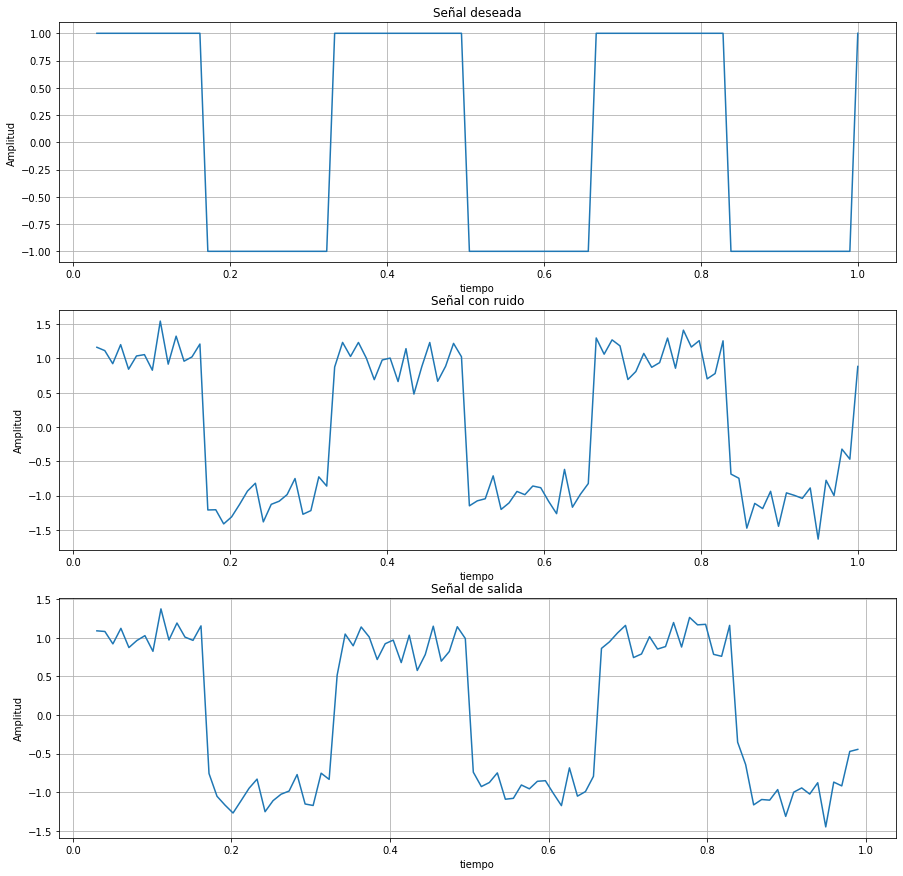

In [16]:
# Aumento en la seÑal de ruido por 10 

N          = 100
M          = 4
fs         = 150
w0         = 3
phi0       = np.pi/4
amp_noise  = 0.02 * 10
ts         = 1/fs
tt         = np.linspace(0, 1, N).flatten()
signal     = sgn.square(2 * np.pi * w0 *tt)

predictor(signal,tt, M, amp_noise, True)

Coeficientes: [0.27833632 0.21214921 0.13337596 0.07916714]
Error cuadratico medio: 1.1228796500182918, 112.28796500182918


1.1228796500182918

<Figure size 720x240 with 0 Axes>

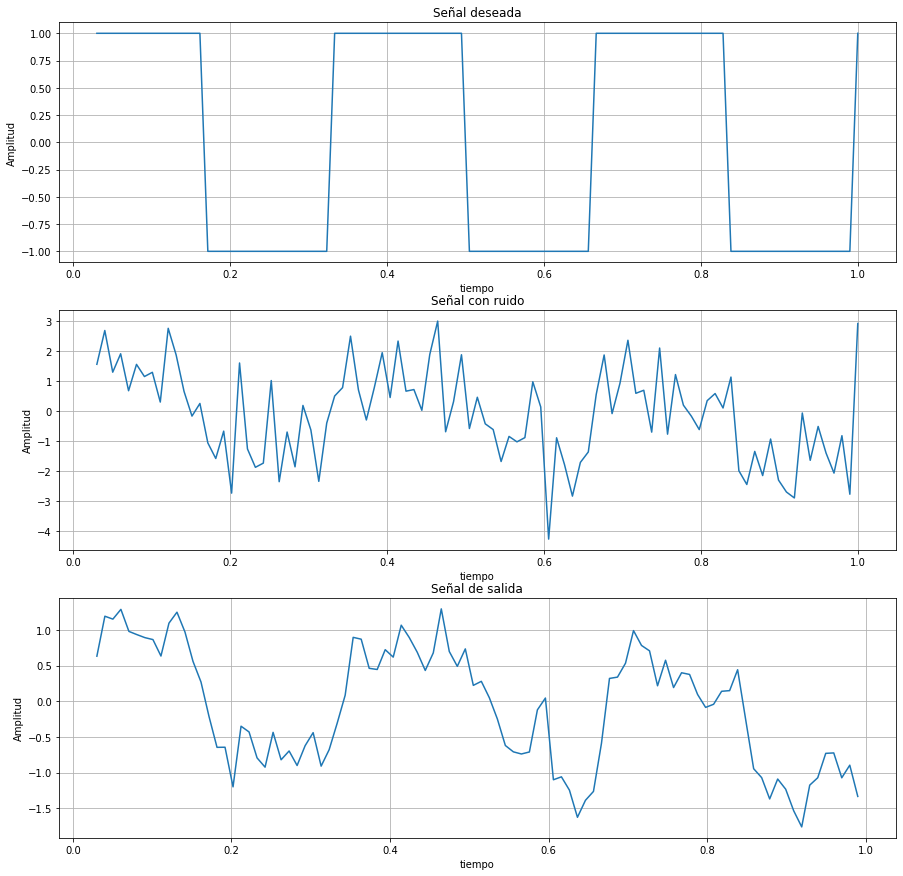

In [17]:
# Aumento en la seÑal de ruido por 10 

N          = 100
M          = 4
fs         = 150
w0         = 3
phi0       = np.pi/4
amp_noise  = 0.02 * 50
ts         = 1/fs
tt         = np.linspace(0, 1, N).flatten()
signal     = sgn.square(2 * np.pi * w0 *tt)

predictor(signal,tt, M, amp_noise, True)

En el caso de señales cuadradas el predictor tiene un buen desempeÑo para niveles altos de ruido (50 veces) ya que se puede reconstruir la señal comparando con el valor medio, es decir en la grafica anterior de señal de salida es posible comparar con el valor 0 y reconstruir la señal deseada.